In [1]:
%load_ext autoreload
%autoreload 2
%autosave 60
%matplotlib inline
from ivanocode.ivanocommon import *
import pandas as pd

Autosaving every 60 seconds


In [2]:
df_sales_train_melt = pd.read_feather('df_sales_train_melt.feather')

In [3]:
df_sales_train_melt.head(2)

,id,item_id,dept_id,cat_id,store_id,state_id,day_id,sales,daily_avg_count,monthly_avg_count,day_date,day_date_str,month_id,month,year,date,wm_yr_wk,sell_price,sell_price_flip_count
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0,0.313643,9.409305,2011-01-29,2011-01-29,1,1,2011,2011-01-29,11101,NaN,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1,0,0.257710,7.731312,2011-01-29,2011-01-29,1,1,2011,2011-01-29,11101,NaN,1


In [4]:
df_sales_train_melt['id'].nunique()

30490

In [5]:
sample_ids = df_sales_train_melt['id'].unique()[0:100]

In [6]:
df_sample = df_sales_train_melt.query('id in @sample_ids')

In [7]:
# needed for the feather
df_sample.reset_index(drop=True, inplace=True)

In [8]:
df_sample.to_feather('df_sales_train_melt_sample100series.feather')

In [9]:
len(df_sample)

191300

In [10]:
from fastai.tabular import *

In [11]:
day_ids = list(sorted(df_sample['day_id'].unique()))
len(day_ids)

1913

In [12]:
valid_idx = np.flatnonzero(df_sample['day_id'] > 1800)

In [13]:
procs = [FillMissing, Categorify, Normalize]
dep_var = 'sales'
cat_names = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'month_id', 'id']
# TODO: see what else other than SNAP's and holidays is missing from the original data
cols = cat_names + ['daily_avg_count'] + [dep_var]

In [14]:
path ='./tmp'
# TODO: check how dates with no sales are represented
data = TabularDataBunch.from_df(path, df_sample[cols], dep_var, valid_idx=valid_idx,
                                procs=procs, cat_names=cat_names)

/usr/local/lib/python3.7/site-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
75, 62
  if getattr(ds, 'warn', False): warn(ds.warn)


In [15]:
learn = tabular_learner(data, layers=[200,100], emb_szs=None, metrics=accuracy)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


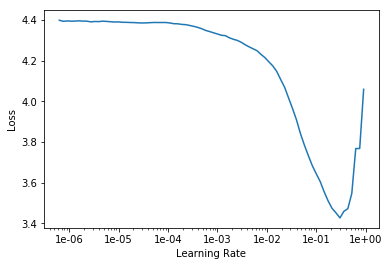

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(3, 2e-1)

epoch,train_loss,valid_loss,accuracy,time
0,1.178017,1.422399,0.597274,05:56
1,1.131882,1.533091,0.594618,06:04
2,1.014365,1.289869,0.598956,05:55


In [18]:
# 8865760240
# df_sales_train_melt.values.nbytes

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


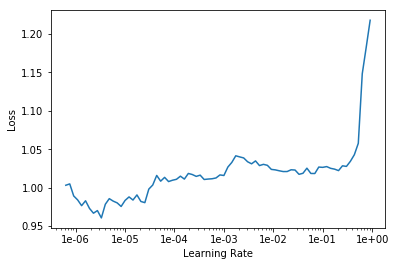

In [19]:
learn.lr_find()
learn.recorder.plot()

In [23]:
df_sample_submission = pd.read_csv('raw/sample_submission.csv')
df_sample_submission.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
d for d in range(28)

In [25]:
list(sorted(df_sales_train_melt['day_date'].unique()))[:10]

[numpy.datetime64('2011-01-29T00:00:00.000000000'),
 numpy.datetime64('2011-01-30T00:00:00.000000000'),
 numpy.datetime64('2011-01-31T00:00:00.000000000'),
 numpy.datetime64('2011-02-01T00:00:00.000000000'),
 numpy.datetime64('2011-02-02T00:00:00.000000000'),
 numpy.datetime64('2011-02-03T00:00:00.000000000'),
 numpy.datetime64('2011-02-04T00:00:00.000000000'),
 numpy.datetime64('2011-02-05T00:00:00.000000000'),
 numpy.datetime64('2011-02-06T00:00:00.000000000'),
 numpy.datetime64('2011-02-07T00:00:00.000000000')]